# Part 1 - Data Preprocessing

In [64]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [65]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [66]:
training_set = df_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [67]:
scaler = MinMaxScaler()
training_set_scaled = scaler.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [68]:
len(training_set_scaled)

1258

In [69]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)    
X_train, y_train

(array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
         0.08497656],
        [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
         0.08627874],
        [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
         0.08471612],
        ...,
        [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
         0.95163331],
        [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
         0.95725128],
        [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
         0.93796041]]),
 array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
        0.93688146]))

In [70]:
#for lstm
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Preparing test data

In [71]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [72]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((df_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [84]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

# Part 2 - Building the RNN

In [74]:
# Importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [90]:
model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(1))

In [91]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [92]:
model.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
19/19 [==============================] - 6s 78ms/step - loss: 0.1439
Epoch 2/100
19/19 [==============================] - 1s 78ms/step - loss: 0.0139
Epoch 3/100
19/19 [==============================] - 1s 79ms/step - loss: 0.0061
Epoch 4/100
19/19 [==============================] - 2s 79ms/step - loss: 0.0053
Epoch 5/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0051
Epoch 6/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0047
Epoch 7/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0045
Epoch 8/100
19/19 [==============================] - 1s 76ms/step - loss: 0.0058
Epoch 9/100
19/19 [==============================] - 1s 76ms/step - loss: 0.0050
Epoch 10/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0044
Epoch 11/100
19/19 [==============================] - 1s 76ms/step - loss: 0.0048
Epoch 12/100
19/19 [==============================] - 1s 77ms/step - loss: 0.0055
Epoch 13/100
19/19 [=====

In [93]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price

array([[0.9359373 ],
       [0.93203706],
       [0.92883503],
       [0.9267893 ],
       [0.9267625 ],
       [0.9297453 ],
       [0.9355553 ],
       [0.9428394 ],
       [0.9503344 ],
       [0.9570222 ],
       [0.9622357 ],
       [0.9656288 ],
       [0.9672269 ],
       [0.9675354 ],
       [0.9671129 ],
       [0.96774834],
       [0.97072357],
       [0.97666353],
       [0.98450464],
       [0.9908985 ]], dtype=float32)

In [94]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[782.24243],
       [780.1459 ],
       [778.42456],
       [777.3248 ],
       [777.3105 ],
       [778.9139 ],
       [782.0371 ],
       [785.9527 ],
       [789.98175],
       [793.57684],
       [796.3794 ],
       [798.2034 ],
       [799.0625 ],
       [799.2283 ],
       [799.00116],
       [799.34283],
       [800.94214],
       [804.13525],
       [808.35034],
       [811.78735]], dtype=float32)

In [95]:
import math
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
math.sqrt(mse)

19.858585946592086

In [97]:
rs = r2_score(real_stock_price, predicted_stock_price)
rs

-0.8145029153225065

# Visualising the results

In [98]:
from matplotlib import pyplot as plt

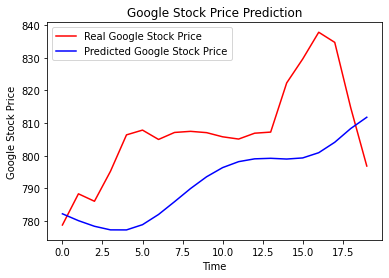

In [99]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()